In [ ]:
-import cv2,os
data_path='/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-I' #xray images kiroscope
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'3Moderate': 0, '1Doubtful': 1, '0Normal': 2, '2Mild': 3, '4Severe': 4}
['3Moderate', '1Doubtful', '0Normal', '2Mild', '4Severe']
[0, 1, 2, 3, 4]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
new_label= tf.keras.utils.to_categorical(label)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))    #input is to output 128 filters to the output matrix 3*3
model.add(Activation('relu'))         # increasing the linearity ie to put color in non negitive integer value to pixel
model.add(MaxPooling2D(pool_size=(2,2)))     # Max pooling layer will go through the matrix by computing the max of each 2×2 pool with a jump of 2
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('linear'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='linear'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='linear'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

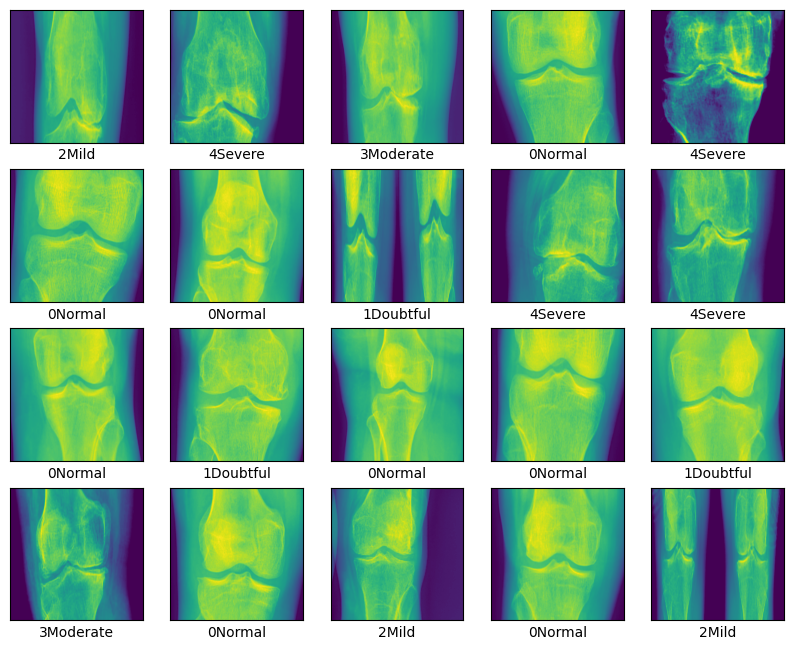

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
 2/38 [>.............................] - ETA: 8:41 - loss: 7.2721 - accuracy: 0.3125 

KeyboardInterrupt: ignored

In [ ]:
path = '/content/gdrive/My Drive/knee'
model.save('model.h5',path)

In [ ]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

In [ ]:
from keras.models import load_model
import keras.utils as image
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
dic = {0 : 'Normal', 1 : 'Doubtful', 2 : 'Mild', 3 : 'Moderate', 4 : 'Severe'}


#Image Size
img_size=256
model = load_model('model.h5')

import numpy as np
import PIL
img_data = PIL.Image.open(img_path )
img_arr = np.array(img_data)

model.make_predict_function()
img_path = '/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-II/1Doubtful/DoubtfulG1 (102).png'
img=cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(img_size,img_size))
i = image.img_to_array(resized)/255.0
i = i.reshape(1,img_size,img_size,1)
predictions = (model.predict(i) > 0.5).astype("int32")
print(predictions)